In [28]:
%matplotlib inline
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns; sns.set()

df = pd.read_csv('MPDataset_MPDS2019b.csv')
df['date'] = pd.to_datetime(df['edate'])
df['year'] = pd.DatetimeIndex(df['date']).year

df.head()

,country,countryname,oecdmember,eumember,edate,date,party,partyname,partyabbrev,parfam,...,per703_1,per703_2,rile,planeco,markeco,welfare,intpeace,datasetversion,id_perm,year
0,11,Sweden,0,0,17/09/1944,1944-09-17,11220,Communist Party of Sweden,SKP,20,...,NaN,NaN,9.60,1.9,1.900,0.0,1.900,2019b,JN1LZH,1944
1,11,Sweden,0,0,17/09/1944,1944-09-17,11320,Social Democratic Labour Party,SAP,30,...,NaN,NaN,-37.80,3.3,2.200,33.4,5.600,2019b,CMR7F6,1944
2,11,Sweden,0,0,17/09/1944,1944-09-17,11420,People’s Party,FP,40,...,NaN,NaN,9.50,3.2,6.400,14.3,1.600,2019b,Z6OL6C,1944
3,11,Sweden,0,0,17/09/1944,1944-09-17,11620,Right Party,NaN,60,...,NaN,NaN,28.00,1.8,22.800,10.6,0.000,2019b,YMKVN2,1944
4,11,Sweden,0,0,17/09/1944,1944-09-17,11810,Agrarian Party,NaN,80,...,NaN,NaN,23.81,0.0,19.048,0.0,4.762,2019b,U4SCRD,1944


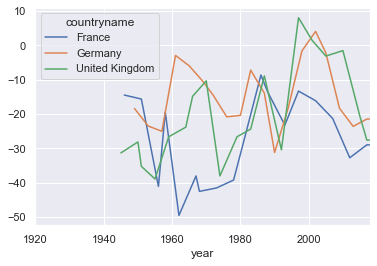

In [33]:
table = pd.pivot_table(df.loc[df['parfam']==30],index='year',columns='countryname',values='rile')

table[['France','Germany','United Kingdom']].interpolate().plot()

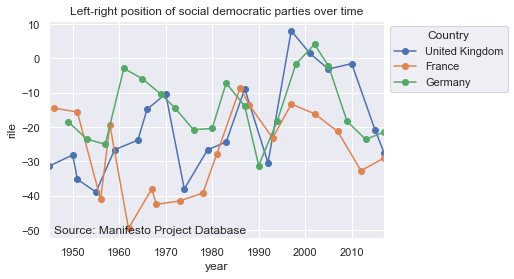

In [44]:
table['United Kingdom'].dropna().plot(marker='o',label='United Kingdom')
table['France'].dropna().plot(marker='o',label='France')
table['Germany'].dropna().plot(marker='o',label='Germany')
plt.legend(loc='upper left',bbox_to_anchor=(1,1),title='Country')
plt.ylabel('rile')
plt.title('Left-right position of social democratic parties over time')
plt.text(1946,-51,'Source: Manifesto Project Database')
plt.savefig('de-fr-uk-comparison.png',bbox_inches='tight',dpi=150)